In [1]:
# Import the required libraries.
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy.editor import *
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [2]:
# Specify the height and width of the images.
IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64

# Specify the number of frames (images) in a sequence.
SEQUENCE_LENGTH = 15

# Specify the directory containing your dataset of images.
DATASET_DIR = "E:/Anamoly Detection"
 
# Specify the list containing the names of the classes used for training. Feel free to choose any set of classes.
CLASSES_LIST = ["Abuse","Arson","Arrest","Explosion","Fighting","RoadAccidents","Robbery","Shooting"]

In [3]:
def load_images(class_name):
    images_list = []
    class_dir = os.path.join(DATASET_DIR, class_name)
    image_files = os.listdir(class_dir)
    image_files.sort()

    for image_file in image_files:
        image_path = os.path.join(class_dir, image_file)
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
        normalized_image = resized_image / 255.0
        images_list.append(normalized_image)

    return images_list

In [4]:
def create_dataset():
    features = []
    labels = []

    for class_index, class_name in enumerate(CLASSES_LIST):
        print(f'Loading data for class: {class_name}')
        images = load_images(class_name)

        for i in range(0, len(images) - SEQUENCE_LENGTH + 1, SEQUENCE_LENGTH):
            sequence = images[i:i+SEQUENCE_LENGTH]
            features.append(sequence)
            labels.append(class_index)
    np.save('features.npy', features)
    np.save('labels.npy' , labels)

    return np.array(features), np.array(labels)


In [5]:
features, labels = create_dataset()

Loading data for class: Abuse
Loading data for class: Arson
Loading data for class: Arrest
Loading data for class: Explosion
Loading data for class: Fighting
Loading data for class: RoadAccidents
Loading data for class: Robbery
Loading data for class: Shooting


In [6]:
features.shape, labels.shape
# labels

((14048, 15, 64, 64, 3), (14048,))

In [7]:
import numpy as np

# Assuming you have a NumPy array 'labels' 
labels = labels.reshape((labels.shape[0], 1))
labels.shape

(14048, 1)

In [8]:
one_hot_encoded_labels = to_categorical(labels)

In [9]:
one_hot_encoded_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

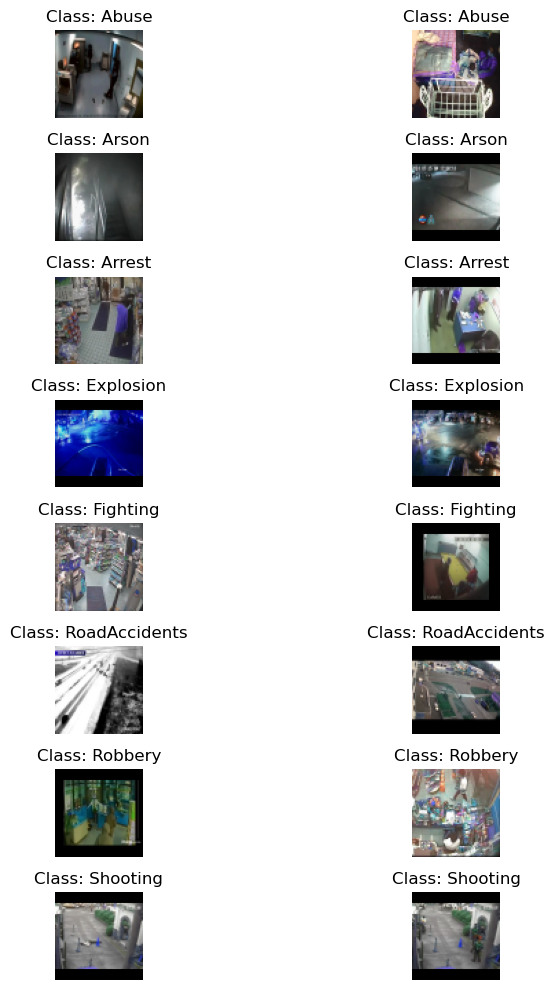

In [10]:
# Create subplots for each class
num_classes = len(CLASSES_LIST)
num_frames_to_show = 2  # Number of frames to show from each class

fig, axes = plt.subplots(num_classes, num_frames_to_show, figsize=(10, 10))

for i, class_name in enumerate(CLASSES_LIST):
    # Find indices of samples from the current class
    class_indices = np.where(labels == i)[0]
    random_indices = random.sample(list(class_indices), min(num_frames_to_show, len(class_indices)))
    
    for j, idx in enumerate(random_indices):
        ax = axes[i][j]
        ax.imshow(features[idx][0])  # Display the first frame of the sequence
        ax.set_title(f'Class: {class_name}')
        ax.axis('off')

plt.tight_layout()
plt.show()

In [11]:
features_train, features_test, labels_train, labels_test = train_test_split(
    features, one_hot_encoded_labels, test_size=0.25, shuffle=True, random_state=42)

In [12]:
features_train.shape , features_test.shape

((10536, 15, 64, 64, 3), (3512, 15, 64, 64, 3))

In [13]:
labels_train.shape , labels_test.shape

((10536, 8), (3512, 8))

# Classes Distribution:

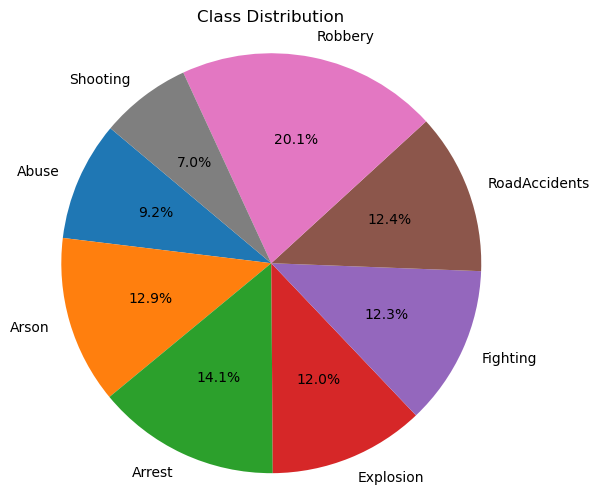

In [14]:
# Count the number of samples for each class using one_hot_encoded_labels
class_counts = [np.sum(one_hot_encoded_labels[:, i]) for i in range(len(CLASSES_LIST))]

# Specify class labels
class_labels = CLASSES_LIST

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Set title
plt.title('Class Distribution')

# Show the pie chart
plt.show()

# Train and Test Data:

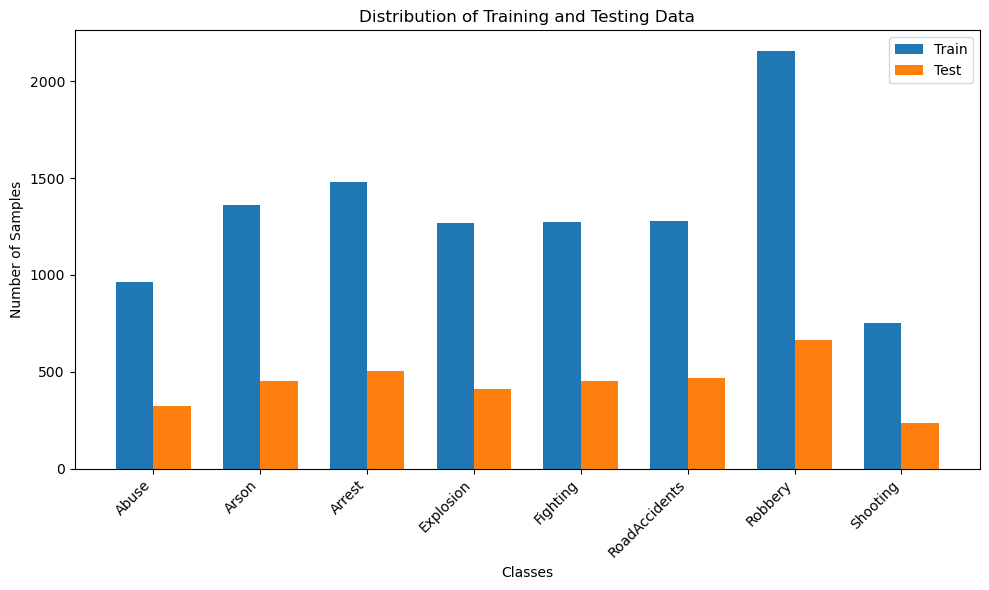

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already split your data into train and test sets
# using features_train, features_test, labels_train, and labels_test

# Count the number of samples for each class in the training and testing sets
train_class_counts = [np.sum(labels_train[:, i]) for i in range(len(CLASSES_LIST))]
test_class_counts = [np.sum(labels_test[:, i]) for i in range(len(CLASSES_LIST))]

# Create an array for class indices
class_indices = np.arange(len(CLASSES_LIST))

# Set the width of the bars
bar_width = 0.35

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for training and testing data
train_bars = ax.bar(class_indices - bar_width/2, train_class_counts, bar_width, label='Train')
test_bars = ax.bar(class_indices + bar_width/2, test_class_counts, bar_width, label='Test')

# Set labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Number of Samples')
ax.set_title('Distribution of Training and Testing Data')
ax.set_xticks(class_indices)
ax.set_xticklabels(CLASSES_LIST, rotation=45, ha="right")
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


# No of Frames in Each Class:

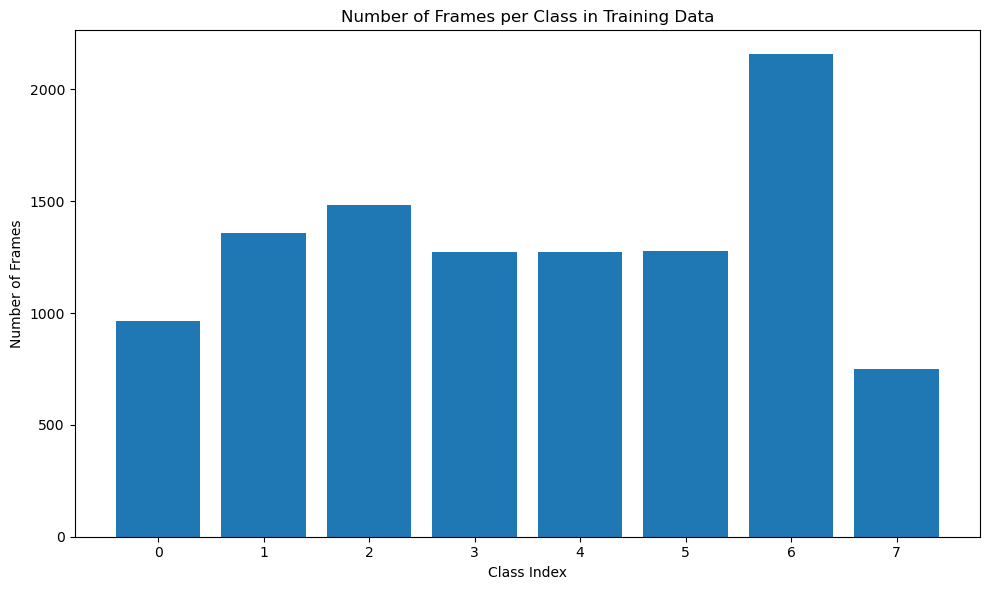

In [16]:
# Count the number of samples for each class in the training set
train_class_counts = [np.sum(labels_train[:, i]) for i in range(len(CLASSES_LIST))]

# Create an array for class indices
class_indices = np.arange(len(CLASSES_LIST))

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(class_indices, train_class_counts, tick_label=class_indices)

# Set labels and title
plt.xlabel('Class Index')
plt.ylabel('Number of Frames')
plt.title('Number of Frames per Class in Training Data')

# Show the plot
plt.tight_layout()
plt.show()

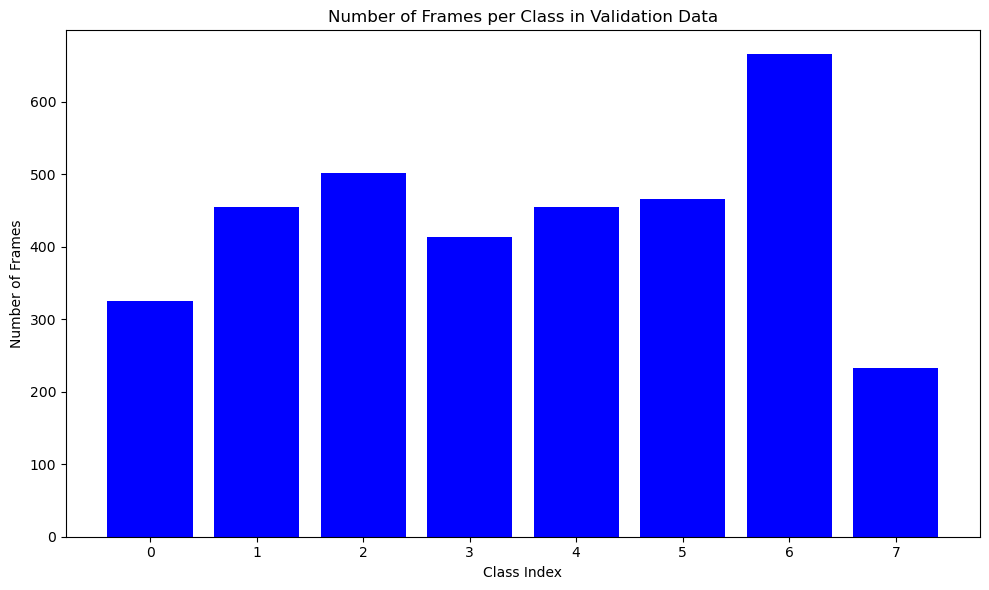

In [17]:
# Count the number of samples for each class in the validation set
validation_class_counts = [np.sum(labels_test[:, i]) for i in range(len(CLASSES_LIST))]

# Create an array for class indices
class_indices = np.arange(len(CLASSES_LIST))

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(class_indices, validation_class_counts, tick_label=class_indices, color='blue')

# Set labels and title
plt.xlabel('Class Index')
plt.ylabel('Number of Frames')
plt.title('Number of Frames per Class in Validation Data')

# Show the plot
plt.tight_layout()
plt.show()


In [18]:
def create_LRCN_model_with_attention():
    model = Sequential()
    
    # Define the Model Architecture.
    ########################################################################################################################
    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same', activation='relu'),
                              input_shape=(SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(TimeDistributed(MaxPooling2D((4, 4)))) 
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same', activation='relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same', activation='relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same', activation='relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    
    model.add(TimeDistributed(Flatten()))
    
    model.add(LSTM(32, return_sequences=True))  # Match the LSTM units with attention
    
    # Apply attention mechanism
    attention = Attention()([model.layers[-2].output, model.layers[-2].output])  # Use the same LSTM output for attention
    attended_out = Concatenate(axis=-1)([model.layers[-2].output, attention])
    
    model.add(LSTM(32, return_sequences=False))  # Match the LSTM units with attention
    
    model.add(Dense(len(CLASSES_LIST), activation='softmax'))
    
    ########################################################################################################################

    model.summary()
    
    return model


In [19]:
LRCN_model_with_attention = create_LRCN_model_with_attention()
print("Model Created Successfully!")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 15, 64, 64, 16)   448       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 15, 16, 16, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 15, 16, 16, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 15, 16, 16, 32)   4640      
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 15, 4, 4, 32)     0

In [20]:
# # Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model_with_attention.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=["accuracy"])

In [21]:
# # Create an Instance of Early Stopping Callback.
# early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)
# LRCN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# # model.summary()

In [22]:
# Start training the model.
LRCN_model_training_history = LRCN_model_with_attention.fit(
    x=features_train, y=labels_train, epochs=100, batch_size=16,
    shuffle=True, validation_split=0.2) #callbacks = [early_stopping_callback])

Epoch 1/100
527/527 [==============================] - 1425s 3s/step - loss: 1.7438 - accuracy: 0.3373 - val_loss: 1.4777 - val_accuracy: 0.4530
Epoch 2/100
527/527 [==============================] - 111s 209ms/step - loss: 1.2409 - accuracy: 0.5596 - val_loss: 1.0145 - val_accuracy: 0.6499
Epoch 3/100
527/527 [==============================] - 109s 206ms/step - loss: 0.8255 - accuracy: 0.7296 - val_loss: 0.6541 - val_accuracy: 0.7955
Epoch 4/100
527/527 [==============================] - 109s 206ms/step - loss: 0.5405 - accuracy: 0.8288 - val_loss: 0.5355 - val_accuracy: 0.8297
Epoch 5/100
527/527 [==============================] - 106s 202ms/step - loss: 0.4087 - accuracy: 0.8723 - val_loss: 0.4112 - val_accuracy: 0.8648
Epoch 6/100
527/527 [==============================] - 108s 206ms/step - loss: 0.3122 - accuracy: 0.9037 - val_loss: 0.3385 - val_accuracy: 0.8961
Epoch 7/100
527/527 [==============================] - 107s 204ms/step - loss: 0.2486 - accuracy: 0.9223 - val_loss: 0.2

In [23]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model_with_attention.evaluate(features_test, labels_test)

110/110 [==============================] - 15s 126ms/step - loss: 0.0911 - accuracy: 0.9804


In [24]:
# Save the trained model
LRCN_model_with_attention.save("LSTM.h5")
print("Model saved as LSTM.h5")

Model saved as LSTM.h5


In [25]:
# Define function to plot metrics
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    epochs = range(len(metric_value_1))

    plt.plot(epochs, metric_value_1, 'blue', label=metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label=metric_name_2)
    plt.title(str(plot_name))
    plt.legend()


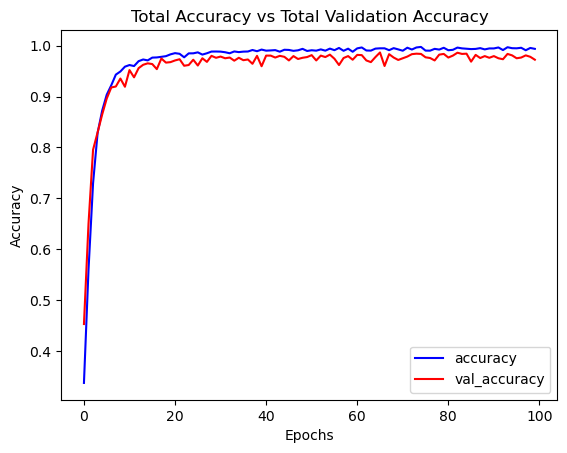

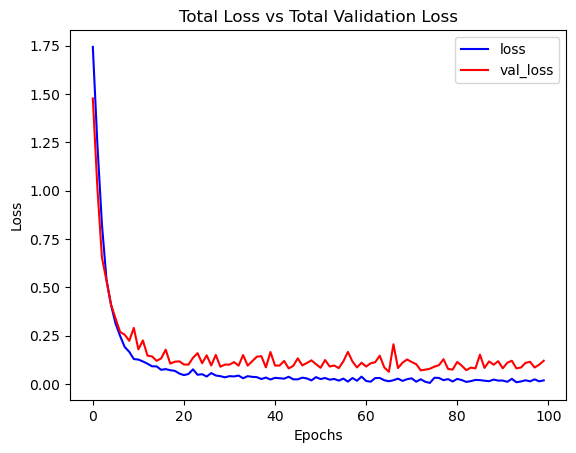

In [26]:
# Plot accuracy and validation accuracy metrics
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.savefig('ACCURACY1.PNG')
plt.show()

# Plot loss and validation loss metrics
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

# Set Y-axis limits to 0-100

plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.savefig('Loss1.png')
plt.show()

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set using the trained model
predictions = LRCN_model_with_attention.predict(features_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels_test, axis=1)

# Calculate the F1 Score, Precision, and Recall
classification_rep = classification_report(true_labels, predicted_labels, target_names=CLASSES_LIST)

# Calculate the Confusion Matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

print("Classification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mtx)


110/110 [==============================] - 20s 123ms/step
Classification Report:
                precision    recall  f1-score   support

        Abuse       0.98      0.99      0.98       325
        Arson       0.99      0.97      0.98       454
       Arrest       0.97      0.97      0.97       502
    Explosion       0.98      0.97      0.98       413
     Fighting       0.98      0.99      0.99       454
RoadAccidents       0.98      0.98      0.98       466
      Robbery       0.99      0.98      0.99       665
     Shooting       0.95      0.99      0.97       233

     accuracy                           0.98      3512
    macro avg       0.98      0.98      0.98      3512
 weighted avg       0.98      0.98      0.98      3512


Confusion Matrix:
 [[321   0   0   0   2   2   0   0]
 [  1 442   2   4   1   2   1   1]
 [  3   0 486   1   3   4   0   5]
 [  2   0   6 400   0   1   2   2]
 [  0   1   1   0 450   1   0   1]
 [  0   0   5   1   0 459   1   0]
 [  1   2   1   1   3   0

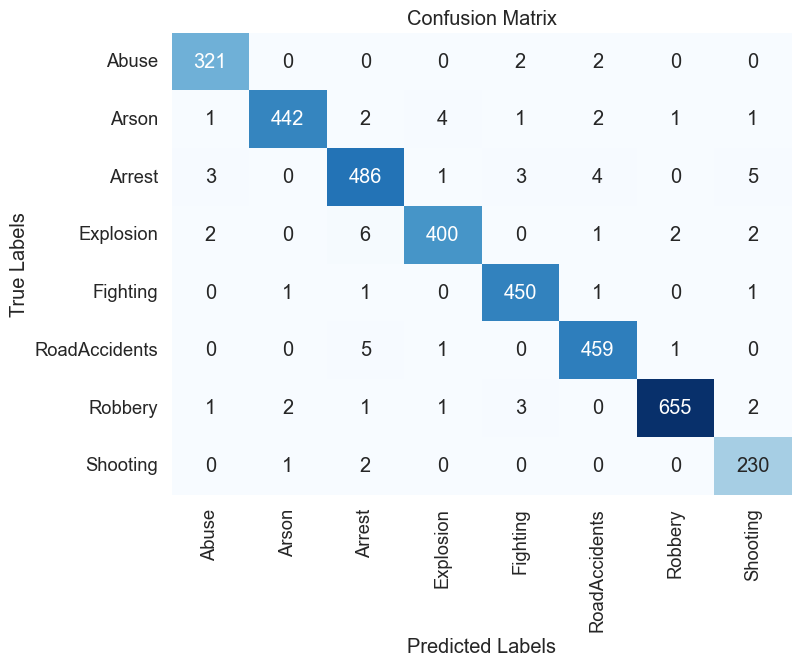

In [28]:
import seaborn as sns

# Define the labels for the confusion matrix
class_labels = CLASSES_LIST

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font scale for better readability
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()